# 스팸 분류

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [34]:
!curl https://raw.githubusercontent.com/StillWork/data/master/sms_spam.csv \
    -o sms_spam.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  488k  100  488k    0     0   161k      0  0:00:03  0:00:03 --:--:--  161k


In [35]:
sms = pd.read_csv('sms_spam.csv', encoding='latin-1')

In [36]:
sms

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will Ã¼ b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


In [39]:
x = sms['text'];x.tolist()

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'Ok lar... Joking wif u oni...',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'U dun say so early hor... U c already then say...',
 "Nah I don't think he goes to usf, he lives around here though",
 "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv",
 'Even my brother is not like to speak with me. They treat me like aids patent.',
 "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
 'WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.',
 'Had y

In [4]:
x = sms['text'].tolist()
y = sms['type'].tolist()

In [5]:
x[:4], y[:4]

(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
  'Ok lar... Joking wif u oni...',
  "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
  'U dun say so early hor... U c already then say...'],
 ['ham', 'ham', 'spam', 'ham'])

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

tfidf = TfidfVectorizer("english")
x_train_tf = tfidf.fit_transform(x_train)
x_test_tf = tfidf.transform(x_test)

mnb = MultinomialNB()
mnb.fit(x_train_tf, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [7]:
from sklearn import metrics
y_pred = mnb.predict(x_test_tf) # 학습된 모델을 이용하여 예측
print(metrics.classification_report(y_test, y_pred)) # 분류 성능 평가

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1460
        spam       1.00      0.68      0.81       213

    accuracy                           0.96      1673
   macro avg       0.98      0.84      0.89      1673
weighted avg       0.96      0.96      0.96      1673



In [8]:
print ("score :", mnb.score(x_test_tf, y_test))

score : 0.9593544530783025


# 다른 알고리즘 비교

In [9]:
import seaborn as sns
import string
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords

In [10]:
def text_process(text):
    #구분자 제거
    text = text.translate(str.maketrans('', '', string.punctuation))
    #모든 텍스트를 소문자로 바꾸고, stopword(불용어)를 제거함
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    
    return " ".join(text)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

In [12]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)
abc = AdaBoostClassifier(n_estimators=62, random_state=111)
bc = BaggingClassifier(n_estimators=9, random_state=111)
etc = ExtraTreesClassifier(n_estimators=9, random_state=111)

In [13]:
clfs = {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc, 'AdaBoost': abc, 'BgC': bc, 'ETC': etc}

In [28]:
#train데이터를 각각의 classifier에 fit하기 위한 함수
def train_classifier(clf, X_train, y_train): 
    clf.fit(X_train, y_train)

#feature를 각각의 classifier를 이용해 예측
def predict_labels(clf, features):
    return (clf.predict(features))

#pred_scores 리스트를 만들고, 분류기의 예측 결과들을 리스트의 원소로 함
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, x_train_tf, y_train) #train데이터를 이용해 분류
    pred = predict_labels(v,x_test_tf) #예측
    pred_scores.append((k, accuracy_score(y_test,pred)))#accuracy 스코어를 리스트에 추가

In [29]:
pred_scores

[('SVC', 0.9910340705319785),
 ('KN', 0.9599521817095039),
 ('NB', 0.9892408846383742),
 ('DT', 0.9653317393903168),
 ('LR', 0.9736999402271369),
 ('RF', 0.9772863120143455),
 ('AdaBoost', 0.9784817692767483),
 ('BgC', 0.9731022115959355),
 ('ETC', 0.9844590555887627)]

In [30]:
#각각의 classifier 스코어 출력
df = pd.DataFrame(pred_scores, columns = ['Model','Score']);df

,Model,Score
0,SVC,0.991034
1,KN,0.959952
2,NB,0.989241
3,DT,0.965332
4,LR,0.973700
5,RF,0.977286
6,AdaBoost,0.978482
7,BgC,0.973102
8,ETC,0.984459


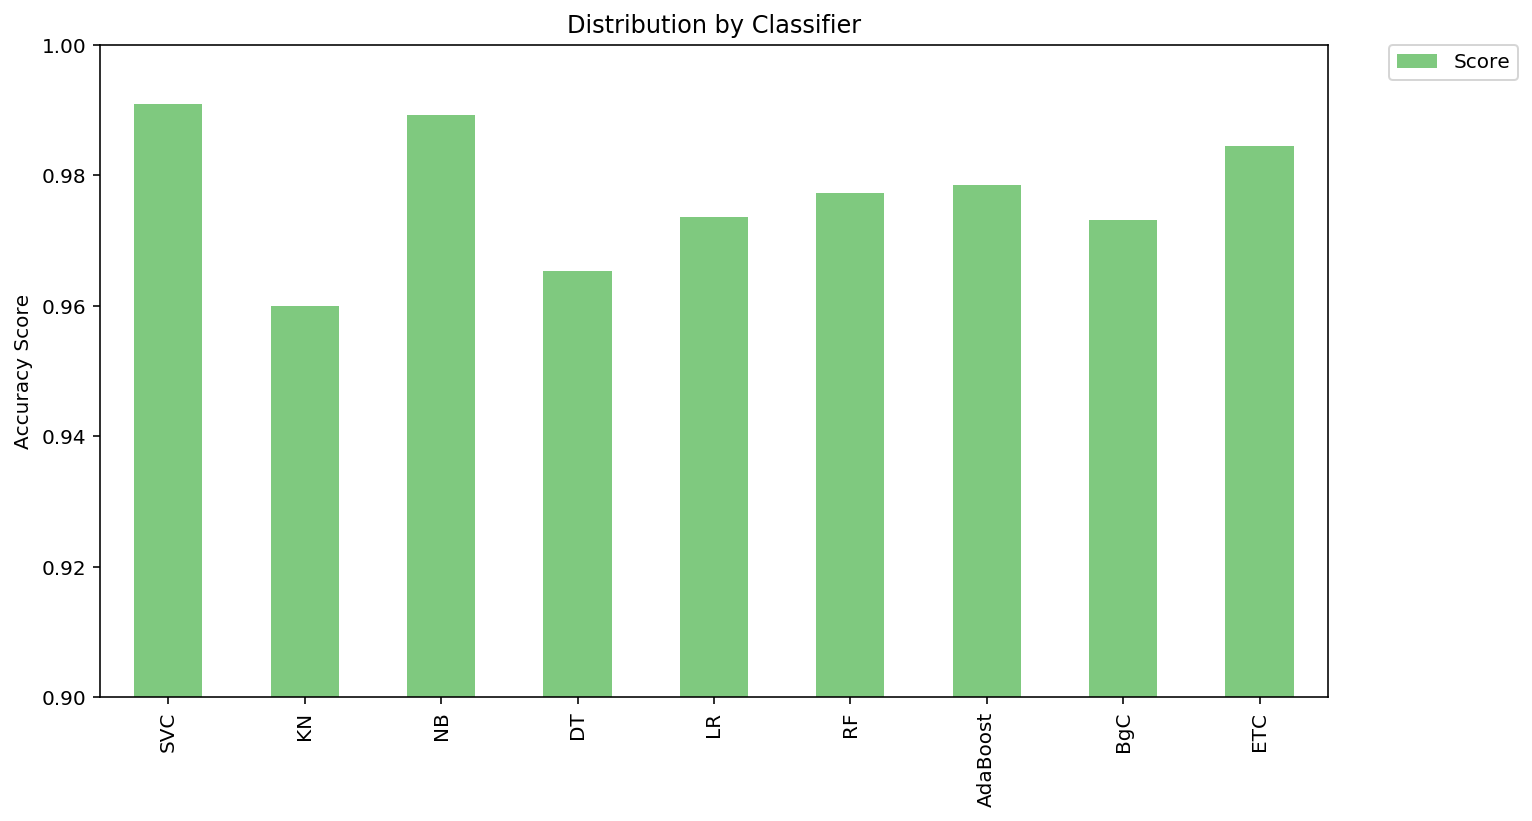

In [32]:
#classifier에 따른 accuracy 히스토그램
df.plot(kind='bar', ylim=(0.9,1.0), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9), df.Model)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
%config InlineBackend.figure_format = 'retina'